# 🎆 [Day 12](https://adventofcode.com/2019/day/12)

In [1]:
import numpy as np


def parse_inputs(inputs):
    moons = np.zeros((len(inputs), 6), dtype=np.int32)
    for i, line in enumerate(inputs):
        pos = line.strip()[1:-1].split(', ')
        pos = [int(x.split('=')[1]) for x in pos]
        moons[i, :3] = pos
    return moons

def motion(moons):
    """One step of motion"""
    # Apply gravity
    gravities = np.sum(np.sign(moons[:, None, :3] - moons[None, :, :3]), axis=0)
    moons[:, 3:] += gravities
    # Apply new velocities
    moons[:, :3] += moons[:, 3:]
    return moons

def get_energy(moons):
    """Return total energy"""
    potential = np.sum(np.abs(moons[:, :3]), axis=-1)
    kinetic = np.sum(np.abs(moons[:, 3:]), axis=-1)
    return np.sum(potential * kinetic)

def part1(inputs, steps=1000):
    """Solution of part 1"""
    moons = parse_inputs(inputs)
    for _ in range(steps):
        motion(moons)
    print(moons)
    return get_energy(moons)


import matplotlib.pyplot as plt
def periodic_xcorr(x):
    """Circular auto-correlation, implemented using the FFT.
    makes a periodicity assumption
    """
    return np.fft.ifft(np.fft.fft(x) * np.fft.fft(x).conj()).real

def simulate_with_plot(inputs, steps=100):
    """Add some plots to detect periodicity in the simulation.
    
    Use the fact that:
      * Knowing positions and velocities means the model is reversible,
      thus periodicity will always lead to initial position at some point
      
      * X, Y and Z axes move independently
    """
    # Plot coordinates and velocities for each moon
    _, axes = plt.subplots(len(inputs), 3, figsize=(10, 12))
    data = np.zeros((steps + 1, len(inputs), 6))
    
    # Simulate
    moons = parse_inputs(inputs)
    data[0] = moons
    for i in range(steps):
        motion(moons)
        data[i] = moons
        
    # Plot
    periods = []
    for i in range(3):
        # Plot
        for moon in range(len(inputs)):
            title = "Moon {} - {}{}".format(
                moon + 1, "" if i // 3 == 0 else "v_", 
                "x" if i % 3 == 0 else "y" if i % 3 == 1 else "z")
            
            # Plot signal versus time
            axes[moon, i].set_title(title)
            axes[moon, i].plot(data[:, moon, i], 
                               data[:, moon, 3 + i], zorder=0)
            axes[moon, i].scatter(data[:1, moon, i], data[:1, moon, 3 + i], 
                                  color='orange', s=50, zorder=1)
        # Find period where all positions and velocities are equal
        x_period = np.where(np.sum(np.abs(data[:, :, i] - data[:1, :, i]), axis=1) == 0)
        vx_period = np.where(np.sum(np.abs(data[:, :, i + 3] - data[:1, :, i + 3]), axis=1) == 0)
        period = np.intersect1d(np.array(x_period), np.array(vx_period))
        if period.shape[0] <= 1:
            print("Number of steps too low to find the first repeatition for {}-th axis".format(i + 1))
            return -1
        period = np.median([b - a for a, b in zip(period[:-1], period[1:])])
        periods.append(int(period))
        
    # Estimate period of signal
    plt.subplots_adjust(hspace=0.5)
    plt.show()
    return np.lcm.reduce(periods)

In [2]:
with open("inputs/day12.txt", 'r') as f:
    inputs = f.read().splitlines()
    
print("The system has a total energy of {} after 100 motion steps".format(part1(inputs)))

[[ 46  14 -23  17   9  14]
 [-30  32  58   0  -4  -1]
 [  4  -7 -36 -15   4  -3]
 [-66 -16 -22  -2  -9 -10]]
The system has a total energy of 7138 after 100 motion steps


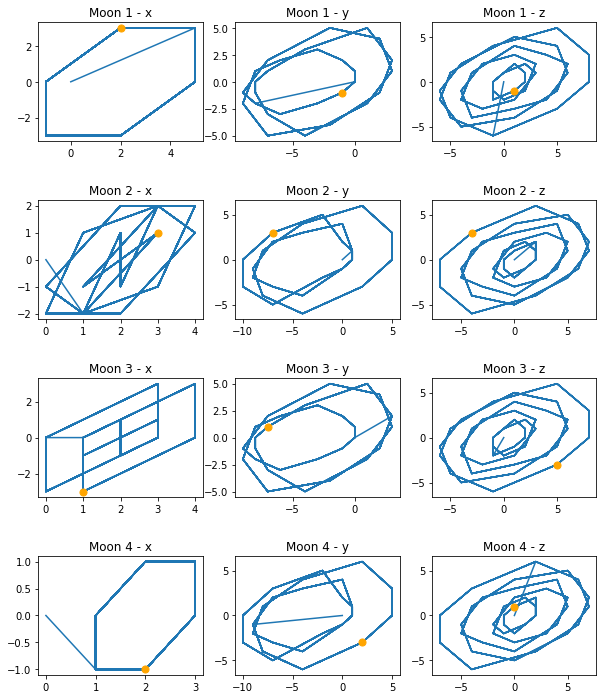

Part 2 test yields expected result: 2772


In [3]:
## Test part2 on small example given with Day 12
test = """<x=-1, y=0, z=2>
<x=2, y=-10, z=-7>
<x=4, y=-8, z=8>
<x=3, y=5, z=-1>""".splitlines()
print("Part 2 test yields expected result: {}".format(simulate_with_plot(test, 200)))

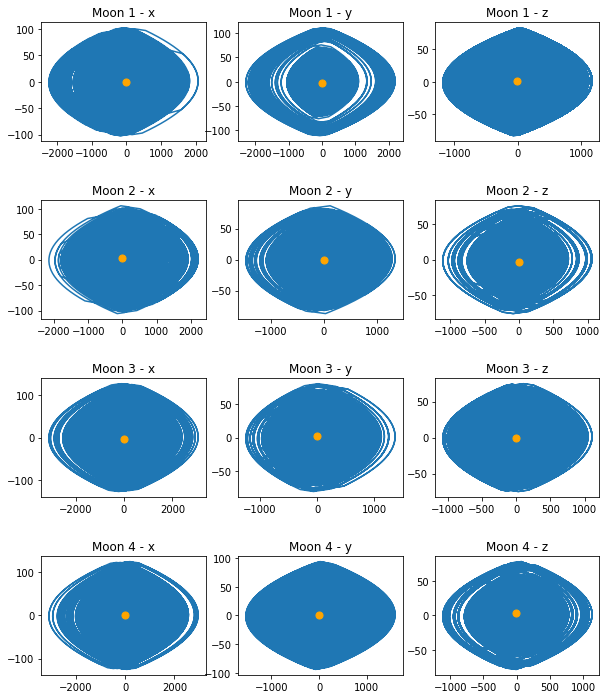

The estimated joint periodicity in Part 2 is 572087463375796

CPU times: user 8.07 s, sys: 88 ms, total: 8.15 s
Wall time: 8.15 s


In [4]:
%%time
print("The estimated joint periodicity in Part 2 is {}\n".format(simulate_with_plot(inputs, 250000)))